In [79]:
%matplotlib inline


# Skops / scikit-learn model cards

This guide demonstrates how you can use this package to create a model card on a
scikit-learn compatible model and save it.


## Imports
First we will import everything required for the rest of this document.



In [80]:
import os
import string
import pickle
import random
from pathlib import Path
from tempfile import mkdtemp, mkstemp

import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,roc_curve
)
from sklearn.model_selection import HalvingGridSearchCV, train_test_split

from skops import hub_utils
from skops.card import Card, metadata_from_config

## Data
We load breast cancer dataset from sklearn.



In [81]:
X, y = load_breast_cancer(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("X's summary: ", X.describe())
print("y's summary: ", y.describe())

X's summary:         mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.00000

## Train a Model
Using the above data, we train a model. To select the model, we use
:class:`~sklearn.model_selection.HalvingGridSearchCV` with a parameter grid
over :class:`~sklearn.ensemble.HistGradientBoostingClassifier`.



In [82]:
param_grid = {
    "max_leaf_nodes": [5, 10, 15],
    "max_depth": [2, 5, 10],
}

model = HalvingGridSearchCV(
    estimator=HistGradientBoostingClassifier(),
    param_grid=param_grid,
    random_state=42,
    n_jobs=-1,
).fit(X_train, y_train)
model.score(X_test, y_test)

0.9590643274853801

## Initialize a repository to save our files in
We will now initialize a repository and save our model



In [84]:
model_name = ''.join(random.choices(string.ascii_lowercase +
                             string.digits, k=6))
model_name

'be1l7r'

In [85]:
local_repo = 'models/skops-'+f'{model_name}'
os.mkdir(f'{local_repo}')

pkl_name = 'models/skops-'+f'{model_name}'+'.pkl'

with open(pkl_name, mode="bw") as f:
    pickle.dump(model, file=f)

hub_utils.init(
    model=pkl_name,
    requirements=[f"scikit-learn={sklearn.__version__}"],
    dst=local_repo,
    task="tabular-classification",
    data=X_test,
)

In [86]:
pkl_name

'models/skops-be1l7r.pkl'

## Create a model card
We now create a model card, and populate its metadata with information which
is already provided in ``config.json``, which itself is created by the call to
:func:`.hub_utils.init` above. We will see below how we can populate the model
card with useful information.



In [87]:
model_card = Card(model, metadata=metadata_from_config(Path(local_repo)))


In [88]:
model_card.save("myModelCard.md")
display(Markdown("myModelCard.md"))

---
library_name: sklearn
tags:
- sklearn
- skops
- tabular-classification
model_format: pickle
model_file: skops-be1l7r.pkl
widget:
  structuredData:
    area error:
    - 30.29
    - 96.05
    - 48.31
    compactness error:
    - 0.01911
    - 0.01652
    - 0.01484
    concave points error:
    - 0.01037
    - 0.0137
    - 0.01093
    concavity error:
    - 0.02701
    - 0.02269
    - 0.02813
    fractal dimension error:
    - 0.003586
    - 0.001698
    - 0.002461
    mean area:
    - 481.9
    - 1130.0
    - 748.9
    mean compactness:
    - 0.1058
    - 0.1029
    - 0.1223
    mean concave points:
    - 0.03821
    - 0.07951
    - 0.08087
    mean concavity:
    - 0.08005
    - 0.108
    - 0.1466
    mean fractal dimension:
    - 0.06373
    - 0.05461
    - 0.05796
    mean perimeter:
    - 81.09
    - 123.6
    - 101.7
    mean radius:
    - 12.47
    - 18.94
    - 15.46
    mean smoothness:
    - 0.09965
    - 0.09009
    - 0.1092
    mean symmetry:
    - 0.1925
    - 0.1582
    - 0.1931
    mean texture:
    - 18.6
    - 21.31
    - 19.48
    perimeter error:
    - 2.497
    - 5.486
    - 3.094
    radius error:
    - 0.3961
    - 0.7888
    - 0.4743
    smoothness error:
    - 0.006953
    - 0.004444
    - 0.00624
    symmetry error:
    - 0.01782
    - 0.01386
    - 0.01397
    texture error:
    - 1.044
    - 0.7975
    - 0.7859
    worst area:
    - 677.9
    - 1866.0
    - 1156.0
    worst compactness:
    - 0.2378
    - 0.2336
    - 0.2394
    worst concave points:
    - 0.1015
    - 0.1789
    - 0.1514
    worst concavity:
    - 0.2671
    - 0.2687
    - 0.3791
    worst fractal dimension:
    - 0.0875
    - 0.06589
    - 0.08019
    worst perimeter:
    - 96.05
    - 165.9
    - 124.9
    worst radius:
    - 14.97
    - 24.86
    - 19.26
    worst smoothness:
    - 0.1426
    - 0.1193
    - 0.1546
    worst symmetry:
    - 0.3014
    - 0.2551
    - 0.2837
    worst texture:
    - 24.64
    - 26.58
    - 26.0
---

# Model description

[More Information Needed]

## Intended uses & limitations

[More Information Needed]

## Training Procedure

### Hyperparameters

The model is trained with below hyperparameters.

<details>
<summary> Click to expand </summary>

| Hyperparameter                  | Value                                                    |
|---------------------------------|----------------------------------------------------------|
| aggressive_elimination          | False                                                    |
| cv                              | 5                                                        |
| error_score                     | nan                                                      |
| estimator__categorical_features |                                                          |
| estimator__early_stopping       | auto                                                     |
| estimator__l2_regularization    | 0.0                                                      |
| estimator__learning_rate        | 0.1                                                      |
| estimator__loss                 | auto                                                     |
| estimator__max_bins             | 255                                                      |
| estimator__max_depth            |                                                          |
| estimator__max_iter             | 100                                                      |
| estimator__max_leaf_nodes       | 31                                                       |
| estimator__min_samples_leaf     | 20                                                       |
| estimator__monotonic_cst        |                                                          |
| estimator__n_iter_no_change     | 10                                                       |
| estimator__random_state         |                                                          |
| estimator__scoring              | loss                                                     |
| estimator__tol                  | 1e-07                                                    |
| estimator__validation_fraction  | 0.1                                                      |
| estimator__verbose              | 0                                                        |
| estimator__warm_start           | False                                                    |
| estimator                       | HistGradientBoostingClassifier()                         |
| factor                          | 3                                                        |
| max_resources                   | auto                                                     |
| min_resources                   | exhaust                                                  |
| n_jobs                          | -1                                                       |
| param_grid                      | {'max_leaf_nodes': [5, 10, 15], 'max_depth': [2, 5, 10]} |
| random_state                    | 42                                                       |
| refit                           | True                                                     |
| resource                        | n_samples                                                |
| return_train_score              | True                                                     |
| scoring                         |                                                          |
| verbose                         | 0                                                        |

</details>

### Model Plot

The model plot is below.

<style>#sk-94730f52-0095-45cf-93e0-9144fccbccd5 {color: black;background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 pre{padding: 0;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-toggleable {background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 label.sk-toggleable__label {cursor: pointer;display: block;width: 100%;margin-bottom: 0;padding: 0.3em;box-sizing: border-box;text-align: center;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 label.sk-toggleable__label-arrow:before {content: "▸";float: left;margin-right: 0.25em;color: #696969;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 label.sk-toggleable__label-arrow:hover:before {color: black;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator:hover label.sk-toggleable__label-arrow:before {color: black;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-toggleable__content {max-height: 0;max-width: 0;overflow: hidden;text-align: left;background-color: #f0f8ff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-toggleable__content pre {margin: 0.2em;color: black;border-radius: 0.25em;background-color: #f0f8ff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 input.sk-toggleable__control:checked~div.sk-toggleable__content {max-height: 200px;max-width: 100%;overflow: auto;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 input.sk-toggleable__control:checked~label.sk-toggleable__label-arrow:before {content: "▾";}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 input.sk-hidden--visually {border: 0;clip: rect(1px 1px 1px 1px);clip: rect(1px, 1px, 1px, 1px);height: 1px;margin: -1px;overflow: hidden;padding: 0;position: absolute;width: 1px;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator {font-family: monospace;background-color: #f0f8ff;border: 1px dotted black;border-radius: 0.25em;box-sizing: border-box;margin-bottom: 0.5em;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator:hover {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item::after {content: "";width: 100%;border-bottom: 1px solid gray;flex-grow: 1;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label:hover label.sk-toggleable__label {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-serial::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 2em;bottom: 0;left: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-serial {display: flex;flex-direction: column;align-items: center;background-color: white;padding-right: 0.2em;padding-left: 0.2em;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-item {z-index: 1;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel {display: flex;align-items: stretch;justify-content: center;background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 2em;bottom: 0;left: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item {display: flex;flex-direction: column;position: relative;background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item:first-child::after {align-self: flex-end;width: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item:last-child::after {align-self: flex-start;width: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item:only-child::after {width: 0;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-dashed-wrapped {border: 1px dashed gray;margin: 0 0.4em 0.5em 0.4em;box-sizing: border-box;padding-bottom: 0.4em;background-color: white;position: relative;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label label {font-family: monospace;font-weight: bold;background-color: white;display: inline-block;line-height: 1.2em;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label-container {position: relative;z-index: 2;text-align: center;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-container {/* jupyter's `normalize.less` sets `[hidden] { display: none; }` but bootstrap.min.css set `[hidden] { display: none !important; }` so we also need the `!important` here to be able to override the default hidden behavior on the sphinx rendered scikit-learn.org. See: https://github.com/scikit-learn/scikit-learn/issues/21755 */display: inline-block !important;position: relative;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-text-repr-fallback {display: none;}</style><div id="sk-94730f52-0095-45cf-93e0-9144fccbccd5" class="sk-top-container" style="overflow: auto;"><div class="sk-text-repr-fallback"><pre>HalvingGridSearchCV(estimator=HistGradientBoostingClassifier(), n_jobs=-1,param_grid={&#x27;max_depth&#x27;: [2, 5, 10],&#x27;max_leaf_nodes&#x27;: [5, 10, 15]},random_state=42)</pre><b>Please rerun this cell to show the HTML repr or trust the notebook.</b></div><div class="sk-container" hidden><div class="sk-item sk-dashed-wrapped"><div class="sk-label-container"><div class="sk-label sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="8364e769-1ac9-4c9e-b0d9-4fa9006e7eaa" type="checkbox" ><label for="8364e769-1ac9-4c9e-b0d9-4fa9006e7eaa" class="sk-toggleable__label sk-toggleable__label-arrow">HalvingGridSearchCV</label><div class="sk-toggleable__content"><pre>HalvingGridSearchCV(estimator=HistGradientBoostingClassifier(), n_jobs=-1,param_grid={&#x27;max_depth&#x27;: [2, 5, 10],&#x27;max_leaf_nodes&#x27;: [5, 10, 15]},random_state=42)</pre></div></div></div><div class="sk-parallel"><div class="sk-parallel-item"><div class="sk-item"><div class="sk-serial"><div class="sk-item"><div class="sk-estimator sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="a4bdc8b2-bb2f-4261-881f-83cadaeefa90" type="checkbox" ><label for="a4bdc8b2-bb2f-4261-881f-83cadaeefa90" class="sk-toggleable__label sk-toggleable__label-arrow">HistGradientBoostingClassifier</label><div class="sk-toggleable__content"><pre>HistGradientBoostingClassifier()</pre></div></div></div></div></div></div></div></div></div></div>

## Evaluation Results

[More Information Needed]

# How to Get Started with the Model

[More Information Needed]

# Model Card Authors

This model card is written by following authors:

[More Information Needed]

# Model Card Contact

You can contact the model card authors through following channels:
[More Information Needed]

# Citation

Below you can find information related to citation.

**BibTeX:**
```
[More Information Needed]
```


## Add more information
So far, the model card does not tell viewers a lot about the model. Therefore,
we add more information about the model, like a description and what its
license is.



In [89]:
model_card.metadata.license = "MIT"

# MODEL DESCRIPTION
model_description = (
    "This is a `HistGradientBoostingClassifier` model trained on breast cancer "
    "dataset. It's trained with `HalvingGridSearchCV`, with parameter grids on "
    "`max_leaf_nodes` and `max_depth`."
)

# LIMITATIONS
limitations = "**Intended application**: job ads on 'arbeidsplassen.no'.\n **Limitations**: Not ready to be used in production."


# WHO MADE IT?
model_card_authors = "Team TADA, PO xyz"
model_card_contact = "**Slack**: #tada, **epost**: ta-kontakt-med-oss@nav.no"
citation_bibtex = "**BibTeX**\n\n```\n@inproceedings{My funky paper,year={2023}}\n, etterlevelse: etterlevelse.intern.nav.no```"



# ADD IT ALL TO THE CARD
model_card.add(
    **{
        "Citation": citation_bibtex,
        "Model Card Authors": model_card_authors,
        "Model Card Contact": model_card_contact,
        "Model description": model_description,
        "Model description/Intended uses & limitations": limitations,
    }
)

Card(
  model=HalvingGridSearchCV(estimator=H...des': [5, 10, 15]}, random_state=42),
  metadata.license=MIT,
  metadata.library_name=sklearn,
  metadata.tags=['sklearn', 'skops', 'tabular-classification'],
  metadata.model_format=pickle,
  metadata.model_file=skops-be1l7r.pkl,
  metadata.widget={...},
  Model description=This is a `HistGrad...on `max_leaf_nodes` and `max_depth`.,
  Model description/Intended uses & lim... Not ready to be used in production.,
  Model description/Training Procedure/...oring | | | verbose | 0 | </details>,
  Model description/Training Procedure/...</div></div></div></div></div></div>,
  Model Card Authors=Team TADA, PO xyz,
  Model Card Contact=**Slack**: #tada, **epost**: ta-kontakt-med-oss@nav.no,
  Citation=**BibTeX** ``` @inproceeding...velse: etterlevelse.intern.nav.no```,
)

## Add plots, metrics, and tables to our model card
Furthermore, to better understand the model performance, we should evaluate it
on certain metrics and add those evaluations to the model card. In this
particular example, we want to calculate the accuracy and the F1 score. We
calculate those using sklearn and then add them to the model card by calling
:meth:`.Card.add_metrics`. But this is not all, we can also add matplotlib
figures to the model card, e.g. a plot of the confusion matrix. To achieve
this, we create the plot using sklearn, save it locally, and then add it using
:meth:`.Card.add_plot` method. Finally, we can also add some useful tables to
the model card, e.g. the results from the grid search and the classification
report. Those can be added using :meth:`.Card.add_table`



Card(
  model=HalvingGridSearchCV(estimator=H...des': [5, 10, 15]}, random_state=42),
  metadata.license=MIT,
  metadata.library_name=sklearn,
  metadata.tags=['sklearn', 'skops', 'tabular-classification'],
  metadata.model_format=pickle,
  metadata.model_file=skops-be1l7r.pkl,
  metadata.widget={...},
  Model description=This is a `HistGrad...on `max_leaf_nodes` and `max_depth`.,
  Model description/Intended uses & lim... Not ready to be used in production.,
  Model description/Training Procedure/...oring | | | verbose | 0 | </details>,
  Model description/Training Procedure/...</div></div></div></div></div></div>,
  Model description/Evaluation Results=...| 0.959064 | | f1 score | 0.959064 |,
  Model description/Evaluation Results/Confusion Matrix='confusion_matrix.png',
  Model description/Evaluation Results/...arameter search results=Table(13x24),
  Model description/Evaluation Results/Classification report=Table(4x5),
  Model Card Authors=Team TADA, PO xyz,
  Model Card Contact=**

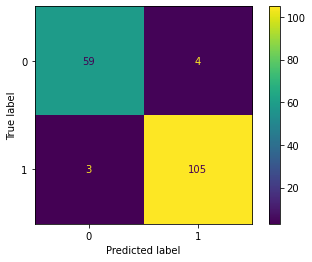

In [90]:
y_pred = model.predict(X_test)

# ADD AN EVALUATION
eval_descr = (
    "The model is evaluated on test data using accuracy and F1-score with "
    "macro average."
)
model_card.add(**{"Model description/Evaluation Results": eval_descr})



# ADD A METRIC
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="micro")


model_card.add_metrics(**{"accuracy": accuracy, "f1 score": f1 })

# ADD A PLOT
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#disp.figure_.savefig(Path(local_repo) / "confusion_matrix.png")
disp.figure_.savefig(Path("confusion_matrix.png"))
model_card.add_plot(
    **{"Model description/Evaluation Results/Confusion Matrix": "confusion_matrix.png"}
)


# ADD A TABLE
cv_results = model.cv_results_
clf_report = classification_report(
    y_test, y_pred, output_dict=True, target_names=["malignant", "benign"]
)
# The classification report has to be transformed into a DataFrame first to have
# the correct format. This requires removing the "accuracy", which was added
# above anyway.
del clf_report["accuracy"]
clf_report = pd.DataFrame(clf_report).T.reset_index()
model_card.add_table(
    folded=True,
    **{
        "Model description/Evaluation Results/Hyperparameter search results": cv_results,
        "Model description/Evaluation Results/Classification report": clf_report,
    },
)

## Save model card
We can simply save our model card by providing a path to :meth:`.Card.save`.



In [91]:
model_card.save("myModelCard.md")

In [92]:
from IPython.display import Markdown, display

display(Markdown("myModelCard.md"))

---
license: MIT
library_name: sklearn
tags:
- sklearn
- skops
- tabular-classification
model_format: pickle
model_file: skops-be1l7r.pkl
widget:
  structuredData:
    area error:
    - 30.29
    - 96.05
    - 48.31
    compactness error:
    - 0.01911
    - 0.01652
    - 0.01484
    concave points error:
    - 0.01037
    - 0.0137
    - 0.01093
    concavity error:
    - 0.02701
    - 0.02269
    - 0.02813
    fractal dimension error:
    - 0.003586
    - 0.001698
    - 0.002461
    mean area:
    - 481.9
    - 1130.0
    - 748.9
    mean compactness:
    - 0.1058
    - 0.1029
    - 0.1223
    mean concave points:
    - 0.03821
    - 0.07951
    - 0.08087
    mean concavity:
    - 0.08005
    - 0.108
    - 0.1466
    mean fractal dimension:
    - 0.06373
    - 0.05461
    - 0.05796
    mean perimeter:
    - 81.09
    - 123.6
    - 101.7
    mean radius:
    - 12.47
    - 18.94
    - 15.46
    mean smoothness:
    - 0.09965
    - 0.09009
    - 0.1092
    mean symmetry:
    - 0.1925
    - 0.1582
    - 0.1931
    mean texture:
    - 18.6
    - 21.31
    - 19.48
    perimeter error:
    - 2.497
    - 5.486
    - 3.094
    radius error:
    - 0.3961
    - 0.7888
    - 0.4743
    smoothness error:
    - 0.006953
    - 0.004444
    - 0.00624
    symmetry error:
    - 0.01782
    - 0.01386
    - 0.01397
    texture error:
    - 1.044
    - 0.7975
    - 0.7859
    worst area:
    - 677.9
    - 1866.0
    - 1156.0
    worst compactness:
    - 0.2378
    - 0.2336
    - 0.2394
    worst concave points:
    - 0.1015
    - 0.1789
    - 0.1514
    worst concavity:
    - 0.2671
    - 0.2687
    - 0.3791
    worst fractal dimension:
    - 0.0875
    - 0.06589
    - 0.08019
    worst perimeter:
    - 96.05
    - 165.9
    - 124.9
    worst radius:
    - 14.97
    - 24.86
    - 19.26
    worst smoothness:
    - 0.1426
    - 0.1193
    - 0.1546
    worst symmetry:
    - 0.3014
    - 0.2551
    - 0.2837
    worst texture:
    - 24.64
    - 26.58
    - 26.0
---

# Model description

This is a `HistGradientBoostingClassifier` model trained on breast cancer dataset. It's trained with `HalvingGridSearchCV`, with parameter grids on `max_leaf_nodes` and `max_depth`.

## Intended uses & limitations

**Intended application**: job ads on 'arbeidsplassen.no'.
 **Limitations**: Not ready to be used in production.

## Training Procedure

### Hyperparameters

The model is trained with below hyperparameters.

<details>
<summary> Click to expand </summary>

| Hyperparameter                  | Value                                                    |
|---------------------------------|----------------------------------------------------------|
| aggressive_elimination          | False                                                    |
| cv                              | 5                                                        |
| error_score                     | nan                                                      |
| estimator__categorical_features |                                                          |
| estimator__early_stopping       | auto                                                     |
| estimator__l2_regularization    | 0.0                                                      |
| estimator__learning_rate        | 0.1                                                      |
| estimator__loss                 | auto                                                     |
| estimator__max_bins             | 255                                                      |
| estimator__max_depth            |                                                          |
| estimator__max_iter             | 100                                                      |
| estimator__max_leaf_nodes       | 31                                                       |
| estimator__min_samples_leaf     | 20                                                       |
| estimator__monotonic_cst        |                                                          |
| estimator__n_iter_no_change     | 10                                                       |
| estimator__random_state         |                                                          |
| estimator__scoring              | loss                                                     |
| estimator__tol                  | 1e-07                                                    |
| estimator__validation_fraction  | 0.1                                                      |
| estimator__verbose              | 0                                                        |
| estimator__warm_start           | False                                                    |
| estimator                       | HistGradientBoostingClassifier()                         |
| factor                          | 3                                                        |
| max_resources                   | auto                                                     |
| min_resources                   | exhaust                                                  |
| n_jobs                          | -1                                                       |
| param_grid                      | {'max_leaf_nodes': [5, 10, 15], 'max_depth': [2, 5, 10]} |
| random_state                    | 42                                                       |
| refit                           | True                                                     |
| resource                        | n_samples                                                |
| return_train_score              | True                                                     |
| scoring                         |                                                          |
| verbose                         | 0                                                        |

</details>

### Model Plot

The model plot is below.

<style>#sk-94730f52-0095-45cf-93e0-9144fccbccd5 {color: black;background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 pre{padding: 0;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-toggleable {background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 label.sk-toggleable__label {cursor: pointer;display: block;width: 100%;margin-bottom: 0;padding: 0.3em;box-sizing: border-box;text-align: center;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 label.sk-toggleable__label-arrow:before {content: "▸";float: left;margin-right: 0.25em;color: #696969;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 label.sk-toggleable__label-arrow:hover:before {color: black;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator:hover label.sk-toggleable__label-arrow:before {color: black;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-toggleable__content {max-height: 0;max-width: 0;overflow: hidden;text-align: left;background-color: #f0f8ff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-toggleable__content pre {margin: 0.2em;color: black;border-radius: 0.25em;background-color: #f0f8ff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 input.sk-toggleable__control:checked~div.sk-toggleable__content {max-height: 200px;max-width: 100%;overflow: auto;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 input.sk-toggleable__control:checked~label.sk-toggleable__label-arrow:before {content: "▾";}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 input.sk-hidden--visually {border: 0;clip: rect(1px 1px 1px 1px);clip: rect(1px, 1px, 1px, 1px);height: 1px;margin: -1px;overflow: hidden;padding: 0;position: absolute;width: 1px;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator {font-family: monospace;background-color: #f0f8ff;border: 1px dotted black;border-radius: 0.25em;box-sizing: border-box;margin-bottom: 0.5em;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-estimator:hover {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item::after {content: "";width: 100%;border-bottom: 1px solid gray;flex-grow: 1;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label:hover label.sk-toggleable__label {background-color: #d4ebff;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-serial::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 2em;bottom: 0;left: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-serial {display: flex;flex-direction: column;align-items: center;background-color: white;padding-right: 0.2em;padding-left: 0.2em;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-item {z-index: 1;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel {display: flex;align-items: stretch;justify-content: center;background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 2em;bottom: 0;left: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item {display: flex;flex-direction: column;position: relative;background-color: white;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item:first-child::after {align-self: flex-end;width: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item:last-child::after {align-self: flex-start;width: 50%;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-parallel-item:only-child::after {width: 0;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-dashed-wrapped {border: 1px dashed gray;margin: 0 0.4em 0.5em 0.4em;box-sizing: border-box;padding-bottom: 0.4em;background-color: white;position: relative;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label label {font-family: monospace;font-weight: bold;background-color: white;display: inline-block;line-height: 1.2em;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-label-container {position: relative;z-index: 2;text-align: center;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-container {/* jupyter's `normalize.less` sets `[hidden] { display: none; }` but bootstrap.min.css set `[hidden] { display: none !important; }` so we also need the `!important` here to be able to override the default hidden behavior on the sphinx rendered scikit-learn.org. See: https://github.com/scikit-learn/scikit-learn/issues/21755 */display: inline-block !important;position: relative;}#sk-94730f52-0095-45cf-93e0-9144fccbccd5 div.sk-text-repr-fallback {display: none;}</style><div id="sk-94730f52-0095-45cf-93e0-9144fccbccd5" class="sk-top-container" style="overflow: auto;"><div class="sk-text-repr-fallback"><pre>HalvingGridSearchCV(estimator=HistGradientBoostingClassifier(), n_jobs=-1,param_grid={&#x27;max_depth&#x27;: [2, 5, 10],&#x27;max_leaf_nodes&#x27;: [5, 10, 15]},random_state=42)</pre><b>Please rerun this cell to show the HTML repr or trust the notebook.</b></div><div class="sk-container" hidden><div class="sk-item sk-dashed-wrapped"><div class="sk-label-container"><div class="sk-label sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="8364e769-1ac9-4c9e-b0d9-4fa9006e7eaa" type="checkbox" ><label for="8364e769-1ac9-4c9e-b0d9-4fa9006e7eaa" class="sk-toggleable__label sk-toggleable__label-arrow">HalvingGridSearchCV</label><div class="sk-toggleable__content"><pre>HalvingGridSearchCV(estimator=HistGradientBoostingClassifier(), n_jobs=-1,param_grid={&#x27;max_depth&#x27;: [2, 5, 10],&#x27;max_leaf_nodes&#x27;: [5, 10, 15]},random_state=42)</pre></div></div></div><div class="sk-parallel"><div class="sk-parallel-item"><div class="sk-item"><div class="sk-serial"><div class="sk-item"><div class="sk-estimator sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="a4bdc8b2-bb2f-4261-881f-83cadaeefa90" type="checkbox" ><label for="a4bdc8b2-bb2f-4261-881f-83cadaeefa90" class="sk-toggleable__label sk-toggleable__label-arrow">HistGradientBoostingClassifier</label><div class="sk-toggleable__content"><pre>HistGradientBoostingClassifier()</pre></div></div></div></div></div></div></div></div></div></div>

## Evaluation Results

You can find the details about evaluation process and the evaluation results.

| Metric   |    Value |
|----------|----------|
| accuracy | 0.959064 |
| f1 score | 0.959064 |

### Confusion Matrix

![Confusion Matrix](confusion_matrix.png)

### Hyperparameter search results

<details>
<summary> Click to expand </summary>

|   iter |   n_resources |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time |   param_max_depth |   param_max_leaf_nodes | params                                  |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |   split0_train_score |   split1_train_score |   split2_train_score |   split3_train_score |   split4_train_score |   mean_train_score |   std_train_score |
|--------|---------------|-----------------|----------------|-------------------|------------------|-------------------|------------------------|-----------------------------------------|---------------------|---------------------|---------------------|---------------------|---------------------|-------------------|------------------|-------------------|----------------------|----------------------|----------------------|----------------------|----------------------|--------------------|-------------------|
|      0 |            44 |      0.0115916  |    0.00272051  |        0.00177932 |      0.000251073 |                 2 |                      5 | {'max_depth': 2, 'max_leaf_nodes': 5}   |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.0116065  |    0.00320438  |        0.00201311 |      0.000567078 |                 2 |                     10 | {'max_depth': 2, 'max_leaf_nodes': 10}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00888877 |    0.000694302 |        0.00173249 |      0.000181195 |                 2 |                     15 | {'max_depth': 2, 'max_leaf_nodes': 15}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.0083447  |    0.000102784 |        0.00160136 |      3.18128e-05 |                 5 |                      5 | {'max_depth': 5, 'max_leaf_nodes': 5}   |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00810332 |    5.47162e-05 |        0.00151811 |      2.95295e-05 |                 5 |                     10 | {'max_depth': 5, 'max_leaf_nodes': 10}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00848608 |    0.000718983 |        0.00158296 |      0.000123928 |                 5 |                     15 | {'max_depth': 5, 'max_leaf_nodes': 15}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00801997 |    8.99704e-05 |        0.00153179 |      2.4782e-05  |                10 |                      5 | {'max_depth': 10, 'max_leaf_nodes': 5}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00799875 |    0.000155526 |        0.00148697 |      2.75249e-05 |                10 |                     10 | {'max_depth': 10, 'max_leaf_nodes': 10} |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00817723 |    0.000514235 |        0.00149999 |      0.000144956 |                10 |                     15 | {'max_depth': 10, 'max_leaf_nodes': 15} |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      1 |           132 |      0.026811   |    0.000639311 |        0.00222239 |      0.00108602  |                10 |                      5 | {'max_depth': 10, 'max_leaf_nodes': 5}  |            0.961538 |            0.923077 |            0.923077 |            0.961538 |            0.961538 |          0.946154 |        0.0188422 |                 2 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |
|      1 |           132 |      0.0314897  |    0.00468494  |        0.00186944 |      0.000227741 |                10 |                     10 | {'max_depth': 10, 'max_leaf_nodes': 10} |            0.961538 |            0.923077 |            0.923077 |            0.961538 |            0.961538 |          0.946154 |        0.0188422 |                 2 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |
|      1 |           132 |      0.0295487  |    0.00113787  |        0.00177555 |      0.000112028 |                10 |                     15 | {'max_depth': 10, 'max_leaf_nodes': 15} |            0.961538 |            0.923077 |            0.923077 |            0.961538 |            0.961538 |          0.946154 |        0.0188422 |                 2 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |
|      2 |           396 |      0.106009   |    0.00183411  |        0.00222511 |      0.000293957 |                10 |                     15 | {'max_depth': 10, 'max_leaf_nodes': 15} |            0.962025 |            0.911392 |            0.987342 |            0.974359 |            0.935897 |          0.954203 |        0.0273257 |                 1 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |

</details>

### Classification report

<details>
<summary> Click to expand </summary>

| index        |   precision |   recall |   f1-score |   support |
|--------------|-------------|----------|------------|-----------|
| malignant    |    0.951613 | 0.936508 |   0.944    |        63 |
| benign       |    0.963303 | 0.972222 |   0.967742 |       108 |
| macro avg    |    0.957458 | 0.954365 |   0.955871 |       171 |
| weighted avg |    0.958996 | 0.959064 |   0.958995 |       171 |

</details>

# How to Get Started with the Model

[More Information Needed]

# Model Card Authors

Team TADA, PO xyz

# Model Card Contact

**Slack**: #tada, **epost**: ta-kontakt-med-oss@nav.no

# Citation

**BibTeX**

```
@inproceedings{My funky paper,year={2023}}
, etterlevelse: etterlevelse.intern.nav.no```


In [ ]:
from skops import card
model_card = card.parse_modelcard("myModelCard.md")
model_card.add(**{"Fairness": "Vi har vurdert at FNR er det beste målet fordi..."})
model_card.save("myModelCard.md")


In [78]:
display(Markdown("myModelCard.md"))

---
license: MIT
library_name: sklearn
tags:
- sklearn
- skops
- tabular-classification
model_format: pickle
model_file: skops-5zkw3n.pkl
widget:
  structuredData:
    area error:
    - 30.29
    - 96.05
    - 48.31
    compactness error:
    - 0.01911
    - 0.01652
    - 0.01484
    concave points error:
    - 0.01037
    - 0.0137
    - 0.01093
    concavity error:
    - 0.02701
    - 0.02269
    - 0.02813
    fractal dimension error:
    - 0.003586
    - 0.001698
    - 0.002461
    mean area:
    - 481.9
    - 1130.0
    - 748.9
    mean compactness:
    - 0.1058
    - 0.1029
    - 0.1223
    mean concave points:
    - 0.03821
    - 0.07951
    - 0.08087
    mean concavity:
    - 0.08005
    - 0.108
    - 0.1466
    mean fractal dimension:
    - 0.06373
    - 0.05461
    - 0.05796
    mean perimeter:
    - 81.09
    - 123.6
    - 101.7
    mean radius:
    - 12.47
    - 18.94
    - 15.46
    mean smoothness:
    - 0.09965
    - 0.09009
    - 0.1092
    mean symmetry:
    - 0.1925
    - 0.1582
    - 0.1931
    mean texture:
    - 18.6
    - 21.31
    - 19.48
    perimeter error:
    - 2.497
    - 5.486
    - 3.094
    radius error:
    - 0.3961
    - 0.7888
    - 0.4743
    smoothness error:
    - 0.006953
    - 0.004444
    - 0.00624
    symmetry error:
    - 0.01782
    - 0.01386
    - 0.01397
    texture error:
    - 1.044
    - 0.7975
    - 0.7859
    worst area:
    - 677.9
    - 1866.0
    - 1156.0
    worst compactness:
    - 0.2378
    - 0.2336
    - 0.2394
    worst concave points:
    - 0.1015
    - 0.1789
    - 0.1514
    worst concavity:
    - 0.2671
    - 0.2687
    - 0.3791
    worst fractal dimension:
    - 0.0875
    - 0.06589
    - 0.08019
    worst perimeter:
    - 96.05
    - 165.9
    - 124.9
    worst radius:
    - 14.97
    - 24.86
    - 19.26
    worst smoothness:
    - 0.1426
    - 0.1193
    - 0.1546
    worst symmetry:
    - 0.3014
    - 0.2551
    - 0.2837
    worst texture:
    - 24.64
    - 26.58
    - 26.0
---

# Model description

This is a `HistGradientBoostingClassifier` model trained on breast cancer dataset. It's trained with `HalvingGridSearchCV`, with parameter grids on `max_leaf_nodes` and `max_depth`.

## Intended uses & limitations

**Intended application**: job ads on 'arbeidsplassen.no'.
 **Limitations**: Not ready to be used in production.

## Training Procedure

### Hyperparameters

The model is trained with below hyperparameters.

<details>
<summary> Click to expand </summary>

| Hyperparameter                      | Value                                                    |
|-------------------------------------|----------------------------------------------------------|
| aggressive_elimination              | False                                                    |
| cv                                  | 5                                                        |
| error_score                         | nan                                                      |
| estimator__bootstrap                | True                                                     |
| estimator__ccp_alpha                | 0.0                                                      |
| estimator__class_weight             |                                                          |
| estimator__criterion                | gini                                                     |
| estimator__max_depth                |                                                          |
| estimator__max_features             | auto                                                     |
| estimator__max_leaf_nodes           |                                                          |
| estimator__max_samples              |                                                          |
| estimator__min_impurity_decrease    | 0.0                                                      |
| estimator__min_samples_leaf         | 1                                                        |
| estimator__min_samples_split        | 2                                                        |
| estimator__min_weight_fraction_leaf | 0.0                                                      |
| estimator__n_estimators             | 100                                                      |
| estimator__n_jobs                   |                                                          |
| estimator__oob_score                | False                                                    |
| estimator__random_state             |                                                          |
| estimator__verbose                  | 0                                                        |
| estimator__warm_start               | False                                                    |
| estimator                           | RandomForestClassifier()                                 |
| factor                              | 3                                                        |
| max_resources                       | auto                                                     |
| min_resources                       | exhaust                                                  |
| n_jobs                              | -1                                                       |
| param_grid                          | {'max_leaf_nodes': [5, 10, 15], 'max_depth': [2, 5, 10]} |
| random_state                        | 42                                                       |
| refit                               | True                                                     |
| resource                            | n_samples                                                |
| return_train_score                  | True                                                     |
| scoring                             |                                                          |
| verbose                             | 0                                                        |

</details>

### Model Plot

The model plot is below.

<style>#sk-d8cf4122-bbc3-476a-af23-15e59771a967 {color: black;background-color: white;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 pre{padding: 0;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-toggleable {background-color: white;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 label.sk-toggleable__label {cursor: pointer;display: block;width: 100%;margin-bottom: 0;padding: 0.3em;box-sizing: border-box;text-align: center;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 label.sk-toggleable__label-arrow:before {content: "▸";float: left;margin-right: 0.25em;color: #696969;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 label.sk-toggleable__label-arrow:hover:before {color: black;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-estimator:hover label.sk-toggleable__label-arrow:before {color: black;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-toggleable__content {max-height: 0;max-width: 0;overflow: hidden;text-align: left;background-color: #f0f8ff;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-toggleable__content pre {margin: 0.2em;color: black;border-radius: 0.25em;background-color: #f0f8ff;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 input.sk-toggleable__control:checked~div.sk-toggleable__content {max-height: 200px;max-width: 100%;overflow: auto;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 input.sk-toggleable__control:checked~label.sk-toggleable__label-arrow:before {content: "▾";}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-estimator input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-label input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 input.sk-hidden--visually {border: 0;clip: rect(1px 1px 1px 1px);clip: rect(1px, 1px, 1px, 1px);height: 1px;margin: -1px;overflow: hidden;padding: 0;position: absolute;width: 1px;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-estimator {font-family: monospace;background-color: #f0f8ff;border: 1px dotted black;border-radius: 0.25em;box-sizing: border-box;margin-bottom: 0.5em;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-estimator:hover {background-color: #d4ebff;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel-item::after {content: "";width: 100%;border-bottom: 1px solid gray;flex-grow: 1;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-label:hover label.sk-toggleable__label {background-color: #d4ebff;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-serial::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 2em;bottom: 0;left: 50%;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-serial {display: flex;flex-direction: column;align-items: center;background-color: white;padding-right: 0.2em;padding-left: 0.2em;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-item {z-index: 1;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel {display: flex;align-items: stretch;justify-content: center;background-color: white;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel::before {content: "";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 2em;bottom: 0;left: 50%;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel-item {display: flex;flex-direction: column;position: relative;background-color: white;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel-item:first-child::after {align-self: flex-end;width: 50%;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel-item:last-child::after {align-self: flex-start;width: 50%;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-parallel-item:only-child::after {width: 0;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-dashed-wrapped {border: 1px dashed gray;margin: 0 0.4em 0.5em 0.4em;box-sizing: border-box;padding-bottom: 0.4em;background-color: white;position: relative;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-label label {font-family: monospace;font-weight: bold;background-color: white;display: inline-block;line-height: 1.2em;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-label-container {position: relative;z-index: 2;text-align: center;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-container {/* jupyter's `normalize.less` sets `[hidden] { display: none; }` but bootstrap.min.css set `[hidden] { display: none !important; }` so we also need the `!important` here to be able to override the default hidden behavior on the sphinx rendered scikit-learn.org. See: https://github.com/scikit-learn/scikit-learn/issues/21755 */display: inline-block !important;position: relative;}#sk-d8cf4122-bbc3-476a-af23-15e59771a967 div.sk-text-repr-fallback {display: none;}</style><div id="sk-d8cf4122-bbc3-476a-af23-15e59771a967" class="sk-top-container" style="overflow: auto;"><div class="sk-text-repr-fallback"><pre>HalvingGridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,param_grid={&#x27;max_depth&#x27;: [2, 5, 10],&#x27;max_leaf_nodes&#x27;: [5, 10, 15]},random_state=42)</pre><b>Please rerun this cell to show the HTML repr or trust the notebook.</b></div><div class="sk-container" hidden><div class="sk-item sk-dashed-wrapped"><div class="sk-label-container"><div class="sk-label sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="ee1bbd1b-4ad7-4875-a81c-3bbc1b1d1c9a" type="checkbox" ><label for="ee1bbd1b-4ad7-4875-a81c-3bbc1b1d1c9a" class="sk-toggleable__label sk-toggleable__label-arrow">HalvingGridSearchCV</label><div class="sk-toggleable__content"><pre>HalvingGridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,param_grid={&#x27;max_depth&#x27;: [2, 5, 10],&#x27;max_leaf_nodes&#x27;: [5, 10, 15]},random_state=42)</pre></div></div></div><div class="sk-parallel"><div class="sk-parallel-item"><div class="sk-item"><div class="sk-serial"><div class="sk-item"><div class="sk-estimator sk-toggleable"><input class="sk-toggleable__control sk-hidden--visually" id="b8c51969-770a-43cc-867b-3d4ffb3f8dd1" type="checkbox" ><label for="b8c51969-770a-43cc-867b-3d4ffb3f8dd1" class="sk-toggleable__label sk-toggleable__label-arrow">RandomForestClassifier</label><div class="sk-toggleable__content"><pre>RandomForestClassifier()</pre></div></div></div></div></div></div></div></div></div></div>

## Evaluation Results

You can find the details about evaluation process and the evaluation results.

| Metric   |    Value |
|----------|----------|
| accuracy | 0.959064 |
| f1 score | 0.959064 |

### Confusion Matrix

![Confusion Matrix](confusion_matrix.png)

### Hyperparameter search results

<details>
<summary> Click to expand </summary>

|   iter |   n_resources |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time |   param_max_depth |   param_max_leaf_nodes | params                                  |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |   split0_train_score |   split1_train_score |   split2_train_score |   split3_train_score |   split4_train_score |   mean_train_score |   std_train_score |
|--------|---------------|-----------------|----------------|-------------------|------------------|-------------------|------------------------|-----------------------------------------|---------------------|---------------------|---------------------|---------------------|---------------------|-------------------|------------------|-------------------|----------------------|----------------------|----------------------|----------------------|----------------------|--------------------|-------------------|
|      0 |            44 |      0.00895605 |    0.000317841 |        0.00178165 |      5.42232e-05 |                 2 |                      5 | {'max_depth': 2, 'max_leaf_nodes': 5}   |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00895329 |    0.000241625 |        0.00169401 |      0.000142005 |                 2 |                     10 | {'max_depth': 2, 'max_leaf_nodes': 10}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00838299 |    0.000374693 |        0.0017426  |      0.000354875 |                 2 |                     15 | {'max_depth': 2, 'max_leaf_nodes': 15}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.0106597  |    0.00150787  |        0.00195684 |      0.000329089 |                 5 |                      5 | {'max_depth': 5, 'max_leaf_nodes': 5}   |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.0101874  |    0.00141818  |        0.00172868 |      0.000224188 |                 5 |                     10 | {'max_depth': 5, 'max_leaf_nodes': 10}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.0100226  |    0.00133962  |        0.00188136 |      0.00057675  |                 5 |                     15 | {'max_depth': 5, 'max_leaf_nodes': 15}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00953956 |    0.00109476  |        0.00315056 |      0.00200261  |                10 |                      5 | {'max_depth': 10, 'max_leaf_nodes': 5}  |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00963163 |    0.00107864  |        0.00184159 |      0.000551194 |                10 |                     10 | {'max_depth': 10, 'max_leaf_nodes': 10} |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      0 |            44 |      0.00929942 |    0.000382893 |        0.00181623 |      0.000155213 |                10 |                     15 | {'max_depth': 10, 'max_leaf_nodes': 15} |            0.875    |            0.5      |            0.625    |            0.75     |            0.375    |          0.625    |        0.176777  |                 5 |             0.628571 |             0.628571 |             0.628571 |             0.514286 |             0.514286 |           0.582857 |         0.0559883 |
|      1 |           132 |      0.0551384  |    0.0107193   |        0.00375123 |      0.001541    |                10 |                      5 | {'max_depth': 10, 'max_leaf_nodes': 5}  |            0.961538 |            0.923077 |            0.923077 |            0.961538 |            0.961538 |          0.946154 |        0.0188422 |                 2 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |
|      1 |           132 |      0.0545668  |    0.00200816  |        0.00392542 |      0.00118689  |                10 |                     10 | {'max_depth': 10, 'max_leaf_nodes': 10} |            0.961538 |            0.923077 |            0.923077 |            0.961538 |            0.961538 |          0.946154 |        0.0188422 |                 2 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |
|      1 |           132 |      0.0342677  |    0.00548567  |        0.00185103 |      0.000266492 |                10 |                     15 | {'max_depth': 10, 'max_leaf_nodes': 15} |            0.961538 |            0.923077 |            0.923077 |            0.961538 |            0.961538 |          0.946154 |        0.0188422 |                 2 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |
|      2 |           396 |      0.106929   |    0.00255599  |        0.00218477 |      0.00012057  |                10 |                     15 | {'max_depth': 10, 'max_leaf_nodes': 15} |            0.962025 |            0.911392 |            0.987342 |            0.974359 |            0.935897 |          0.954203 |        0.0273257 |                 1 |             1        |             1        |             1        |             1        |             1        |           1        |         0         |

</details>

### Classification report

<details>
<summary> Click to expand </summary>

| index        |   precision |   recall |   f1-score |   support |
|--------------|-------------|----------|------------|-----------|
| malignant    |    0.951613 | 0.936508 |   0.944    |        63 |
| benign       |    0.963303 | 0.972222 |   0.967742 |       108 |
| macro avg    |    0.957458 | 0.954365 |   0.955871 |       171 |
| weighted avg |    0.958996 | 0.959064 |   0.958995 |       171 |

</details>

## Fairness assessment

The *False Negative Rate* is used a key fairness metric, because...

# How to Get Started with the Model

[More Information Needed]

# Model Card Authors

Team TADA, PO xyz

# Model Card Contact

**Slack**: #tada, **epost**: tada@nav.no

# Citation

**BibTeX**

```
@inproceedings{My funky paper,year={2023}}
, etterlevelse: etterlevelse.intern.nav.no```

# Fairness assessment

The *False Negative Rate* is used a key fairness metric, because...


In [ ]:
local_repo

In [ ]:
model_card.save(Path(f"{local_path}/README.md"))

In [ ]:
local_path = os.getcwd()